## Group Members: Fill in the Student IDs of each group member here

Replace the lines below to list each persons full student ID. Add lines as needed for your group size, and make sure each ID is listed on a separate line. 

**Yuanhao Zhu** A13626824

**Jinwei Ren** A92061199

**Yijie Fan** A13485989

**Bolin Yang** A92111272

**Mu He** A13361247

**Xuan Zhang** A14173638

## Background Introduction
Housing is a major part of modern human life. The housing price is an important property that people will consider when they purchase or rent houses or apartments. Here we explore the potential factors that will influence the housing price and our result could help people understand the composition of the housing price, and provide people a better vision on the housing price for a better choice.

The 8 Biggest Factors that Affect Real Estate Prices talked about macro-factors and micro-factors that can influence the real estate prices. Here we focus on the micro-factors: property locations (proximity and quality of local schools, companies, and shopping centers etc. ), updates and upgrades (such as how upgraded the home electronics and indoor decorations are), Inspection report, neighborhood comparable properties (the recent nearby transaction of properties can influence the price of your properties), and the appraisal price.

In addition to the factors listed above, the website called Homeguru also offers some factors could influence the housing price: supply and demands of housing, potential room numbers, parking, and local demographics. From the reference above, we have a basic idea of factors could affect the housing prices, then we relate to our data frame, do our own analysis. Finally, we can look at the factors we figured out from our data, and compare to the factors listed above.

## Data Description and Privacy/Ethics Considerations
The database we use is allowed for public access. It is a dataset in the famous Google data competition “Kaggle” named “House Prices: Advanced Regression Techniques” that is available for everyone (https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). The dataset contains 2 CSV files, ‘train.csv’ and ‘test.csv’. They contain all data fields such as house style, neighborhood, and corresponding house prices.

Although the database we use is completely public, we still have our privacy concerns regarding our datasets. For example, the neighborhood reveals geographic subdivisions smaller than a state. Certainly, we don’t want to reveal information that might disturb the privacy of the owner. So after careful consideration, we have decided to comply with the Safe Harbor Method and anonymized our data. Besides this, the dataset is pretty neutral without potential biases, and not a certain population are excluded. Since most of the features in the dataset are tightly related to the house itself (such as house style, roof style, year built), more issues related to data privacy and ethics are unlikely to show up.

## Import necessary libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import patsy
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from scipy.stats import ttest_ind, chisquare, normaltest, norm
from matplotlib.gridspec import GridSpec

/Users/hemu/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Preprocess the data

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_sample = pd.read_csv('sample_submission.csv')

In [3]:
df_sample['SalePrice'] = df_sample['SalePrice'].round(0).astype(int)
df_test['SalePrice'] = df_sample['SalePrice']
df = df_train.append(df_test)
df = df.set_index('Id')

Data cleaning: For this part, we don't need the columns such as Lot, Root, Basement, etc. So we drop these columns.  

In [4]:
df = df.drop(['MSSubClass','MSZoning','LotFrontage','Street','Alley', 'LotShape','LandContour','Utilities','LotConfig','LandSlope', 'BldgType', 'RoofStyle', 'RoofMatl','Exterior1st','Exterior2nd','MasVnrType', 'MasVnrArea', 'RoofStyle'], axis = 1 )

Now we create a new column called PricePerSquare which denotes the price per area. 

In [6]:
df['PricePerSquare'] = df['SalePrice']/df['GrLivArea']

Then, we want to check if the data for PricePerSquare is normal.

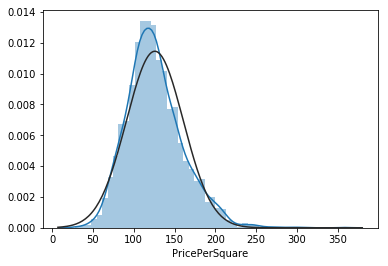

In [7]:
sns.distplot(df['PricePerSquare'], fit=norm);

Since the data does not fit into normal distribution really well, we will apply log transformation to our data. 

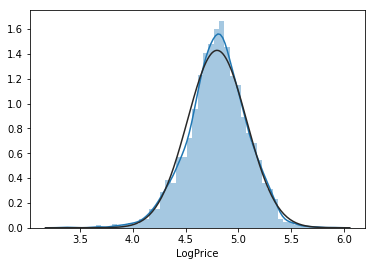

In [8]:
df['LogPrice'] = np.log(df['PricePerSquare'])
sns.distplot(df['LogPrice'], fit=norm);

## Part 1 Analysis based on housing quality and price

Our goal here is to analyze whether housing quality has a strong correlation to housing prices. To do so, we use linear regression to plot a graph with housing quality and housing prices.

In [9]:
df_QP = pd.DataFrame()
df_QP['price'] = df['PricePerSquare']
df_QP['quality'] = df['OverallQual'] 
outcome, predictors = patsy.dmatrices('price~quality', df_QP)
mod = sm.OLS(outcome, predictors)
result = mod.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     52.70
Date:                Wed, 06 Mar 2019   Prob (F-statistic):           4.97e-13
Time:                        14:12:02   Log-Likelihood:                -14480.
No. Observations:                2919   AIC:                         2.896e+04
Df Residuals:                    2917   BIC:                         2.898e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    145.9313      2.835     51.483      0.0

By the R-squared and p- value shown above, we can conclude that the relationship between quality and price is strong, let's plot the data so that we can visualize data.

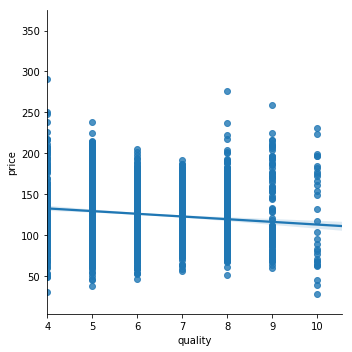

In [20]:
fig=sns.lmplot(x='quality', y='price',data=df_QP,fit_reg=True) 
fig.set(xlim=(4, None))
fig.set(ylim=(4,None))
plt.show()

In [21]:
df_CP = pd.DataFrame()
df_CP['price'] = df['PricePerSquare']
df_CP['condition'] = df['OverallCond'] 
outcome, predictors = patsy.dmatrices('price~condition', df_CP)
mod = sm.OLS(outcome, predictors)
result = mod.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     25.60
Date:                Sun, 03 Mar 2019   Prob (F-statistic):           4.45e-07
Time:                        16:53:42   Log-Likelihood:                -14494.
No. Observations:                2919   AIC:                         2.899e+04
Df Residuals:                    2917   BIC:                         2.900e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    109.6362      3.275     33.478      0.0

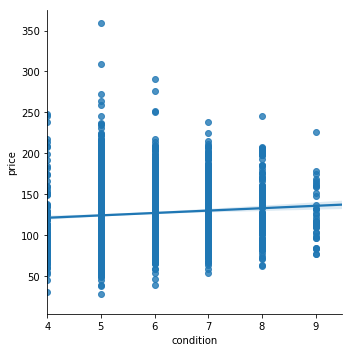

In [22]:
fig=sns.lmplot(x='condition', y='price',data=df_CP,fit_reg=True) 
fig.set(xlim=(4, None))
fig.set(ylim=(4,None))
plt.show()

## Part 2 Analysis based on housing style and price

Our goal here is to analyze which housing style predicts a higher price. To do so, we use logisitic regression to classify and plot a graph with housing style and housing prices.

First find top 50 highest price in PricePerSquare. Then summary their neighborhood.

In [23]:
df_top = df.sort_values(['PricePerSquare'], ascending=False)[0:50]

In [24]:
df_top

,LotArea,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PricePerSquare,LogPrice
Id,,,,,,,,,,,,,,,,,,,,,
2099,7311,OldTown,Norm,Norm,1Story,2,5,1946,1950,TA,...,NaN,NaN,0,3,2008,WD,Abnorml,145998,358.717445,5.882535
2786,7830,OldTown,Norm,Norm,1Story,3,5,1921,1950,TA,...,NaN,NaN,0,6,2006,WD,Normal,152129,309.205285,5.734005
2872,8088,Edwards,Feedr,Norm,1Story,2,3,1922,1955,TA,...,NaN,NaN,0,2,2006,ConLD,Normal,148217,297.624498,5.695833
1914,10200,IDOTRR,Norm,Norm,1Story,4,6,1925,1950,TA,...,NaN,NaN,0,5,2009,WD,Normal,166271,290.683566,5.672235
689,8089,StoneBr,Norm,Norm,1Story,8,6,2007,2007,Gd,...,NaN,NaN,0,10,2007,New,Partial,392000,276.250881,5.621309
1601,8154,IDOTRR,Norm,Norm,1Story,2,5,1941,1950,TA,...,NaN,NaN,0,4,2010,ConLw,Normal,146966,272.159259,5.606387
1788,5400,OldTown,Artery,Norm,1Story,2,5,1940,1950,Fa,...,NaN,NaN,0,6,2009,WD,Normal,157930,263.656093,5.574646
899,12919,NridgHt,Norm,Norm,1Story,9,5,2009,2010,Ex,...,NaN,NaN,0,3,2010,New,Partial,611657,258.738156,5.555817
1586,8777,Edwards,Feedr,Norm,1Story,3,6,1945,2007,TA,...,NaN,NaN,0,4,2010,ConLD,Normal,161468,252.293750,5.530594


In [25]:
df_top_neighbor = df_top['Neighborhood']

In [26]:
df_top_quality = df_top['OverallQual']
df_top_condition = df_top['OverallCond']
df_top_year = df_top[['YearBuilt','PricePerSquare']]

In [27]:
df_top_neighbor.value_counts()

OldTown    8
IDOTRR     8
NridgHt    6
Sawyer     5
Edwards    4
StoneBr    3
BrkSide    3
Mitchel    3
CollgCr    3
NAmes      3
MeadowV    1
Gilbert    1
Somerst    1
Crawfor    1
Name: Neighborhood, dtype: int64

In [28]:
df_top_quality.value_counts()

5     12
4      9
3      9
2      7
9      6
8      4
10     2
1      1
Name: OverallQual, dtype: int64

In [29]:
df_top_condition.value_counts()

5    24
6     8
7     5
4     5
3     4
2     2
9     1
8     1
Name: OverallCond, dtype: int64

In [30]:
df_top_year

,YearBuilt,PricePerSquare
Id,,
2099,1946,358.717445
2786,1921,309.205285
2872,1922,297.624498
1914,1925,290.683566
689,2007,276.250881
1601,1941,272.159259
1788,1940,263.656093
899,2009,258.738156
1586,1945,252.293750


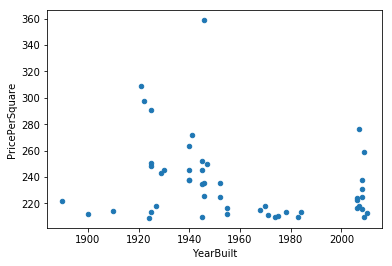

In [31]:
df_top_year.plot.scatter(x='YearBuilt', y='PricePerSquare')

(100, 160)

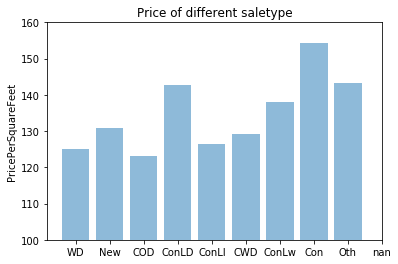

In [34]:
avg = []   
for type in df['SaleType'].unique():
    avg.append(df[df['SaleType'] == type]['PricePerSquare'].mean())
y_pos = np.arange(len(df['SaleType'].unique()))
plt.bar(y_pos, avg, align='center', alpha=0.5)
plt.xticks(y_pos,  df['SaleType'].unique())
plt.ylabel('PricePerSquareFeet')
plt.title('Price of different saletype')
axes = plt.gca()
axes.set_ylim([100,160])

outcome_1, predictors_1 = patsy.dmatrices('PricePerSquare ~ SaleType', df)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

We want to see if different neighborhood will affect their housing price. We will use a histogram to plot the distribution between neighborhood and housing price.

(100, 150)

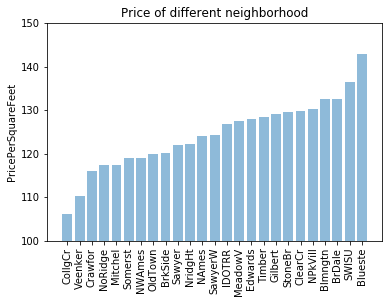

In [68]:
avg = []
x = df['Neighborhood'].unique()
for type in df['Neighborhood'].unique():
    avg.append(df[df['Neighborhood'] == type]['PricePerSquare'].mean())
avg, x = zip(*sorted(zip(avg, x)))
y_pos = np.arange(len(x))
plt.bar(y_pos, avg, align='center', alpha=0.5)
plt.xticks(y_pos,  df['Neighborhood'].unique(), rotation = 90)
plt.ylabel('PricePerSquareFeet')
plt.title('Price of different neighborhood')
axes = plt.gca()
axes.set_ylim([100,150])

We want to see if different housing style will affect their housing price. We will use a pie chart to plot the distribution between housing style and housing price.

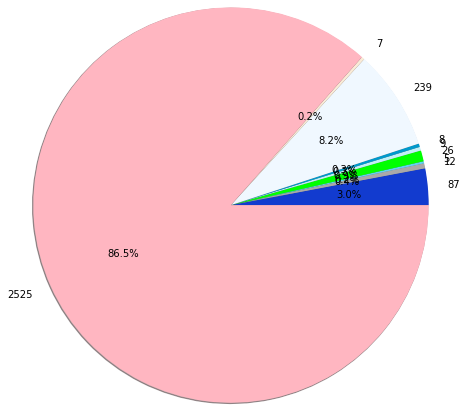

In [61]:
saletype_tbl = df[['SaleType','PricePerSquare']].groupby('SaleType').count()
the_grid = GridSpec(2, 2)
plt.subplot(the_grid[0, 0], aspect=1)
plt.pie(saletype_tbl['PricePerSquare'], labels=list(saletype_tbl['PricePerSquare']), autopct='%1.1f%%', shadow=True,
radius = 5, colors=['#123BCF', '#A9A9A9', '#63D1F4', '#00FF00','#C1F0F6', '#0099CC', '#F0F8FF', '#FAEBD7', '#FFB6C1', '#A9A9A9'])
plt.show()

In [43]:

saletype_tbl


,PricePerSquare
SaleType,
COD,87
CWD,12
Con,5
ConLD,26
ConLI,9
ConLw,8
New,239
Oth,7
WD,2525


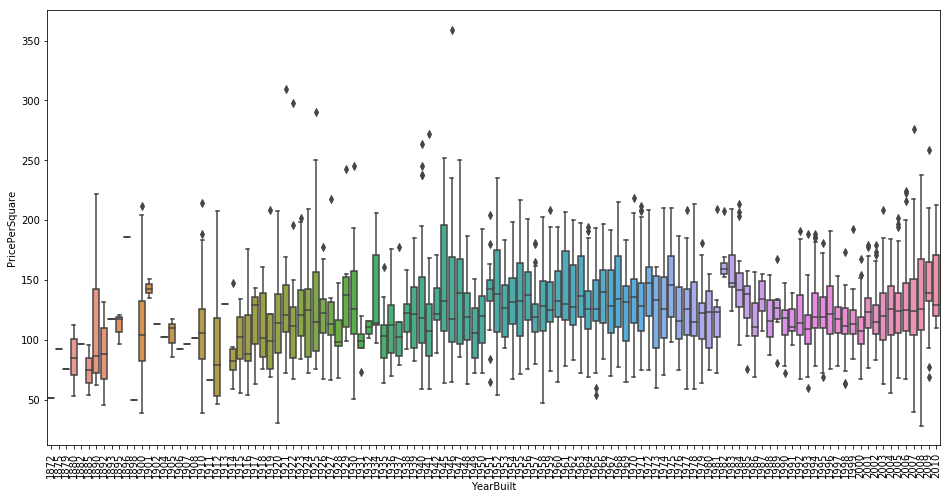

In [35]:
f, ax = plt.subplots(figsize=(16,8))
data = df[['YearBuilt', "PricePerSquare"]]
sns.boxplot(data=data, x="YearBuilt", y="PricePerSquare")
plt.xticks(rotation=90);

### Discussion

After a close inspection of our project, we conclude that our major analyses and hypotheses are correct, i.e., different house styles affect people’s willingness to pay and the higher the overall quality, the higher the housing price is. The major contribution of this project is our model will show users several factors they will need to consider before they look for a house. Construction companies can also benefit from our analyses since they could spend money improving factors that customers value the most and less on factors that are costly but inessential.  

However, if it seems that we are unable to determine factors that largely influence the house prices, we would look for do some research to see some other possible factors.Then we will try to find datasets that we could use to check whether or not those new factors contribute greatly to the house prices. In fact, determining housing prices is difficult since it needs to take plenty of factors into consideration, and thus there are still many more factors affecting housing prices that are not included in our analyses. Besides, there are potential pitfalls of our data: first, the dataset only contains 2919 variables. As a result, we don’t have enough instances of the house for our analysis. Second, the dataset doesn’t scale outside the city of Ames, Iowa. As a result, we restrict our analysis and may subject to bias. In conclusion, although the dataset provides buyer some insight about the housing price, it is still far from enough to find a full-fledged housing formula for house buyers.

### Final Conclusion